<a href="https://colab.research.google.com/github/alexandersanchezjr/deeplearning/blob/main/Arevalo_Sanchez-LogRegNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📌 Introducción

Los residuos son un problema global importante. Se generan volúmenes cada vez mayores de residuos a medida que aumentan la población mundial y los niveles de vida. La gente está cada vez más preocupada por la producción de residuos y sus efectos, y busca formas de abordar el problema.

El reciclaje es el proceso de convertir materiales de desecho en nuevos materiales y objetos. A menudo se incluye en este concepto la recuperación de energía a partir de materiales de desecho. La reciclabilidad de un material depende de su capacidad para readquirir las propiedades que tenía en su estado original. Es una alternativa a la eliminación de residuos "convencional" que puede ahorrar material y ayudar a reducir las emisiones de gases de efecto invernadero. El reciclaje puede prevenir el desperdicio de materiales potencialmente útiles y reducir el consumo de materias primas frescas, reduciendo así: el uso de energía, la contaminación del aire (por incineración) y la contaminación del agua (por vertidos).

 **En este notebook clasificaremos los residuos como orgánicos o reciclables mediante Regresión Logística.**

## 1. Importar librerías

In [ ]:
import numpy as np
import pandas as pd
import glob
import matplotlib.pyplot as plt
import scipy
import os
from PIL import Image
from keras.preprocessing.image import ImageDataGenerator
from scipy import ndimage
import cv2
import pathlib
import random


%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path = '/content/drive/MyDrive/organic_or_recyclable'
data_dir = pathlib.Path(path)

In [ ]:
#Vemos la cantidad de imagenes que tendremos en nuestro drive
image = glob.glob("/content/drive/MyDrive/organic_or_recyclable/*/*.jpg")
image = pd.Series(image)
print("No of images :", len(image))

No of images : 2513


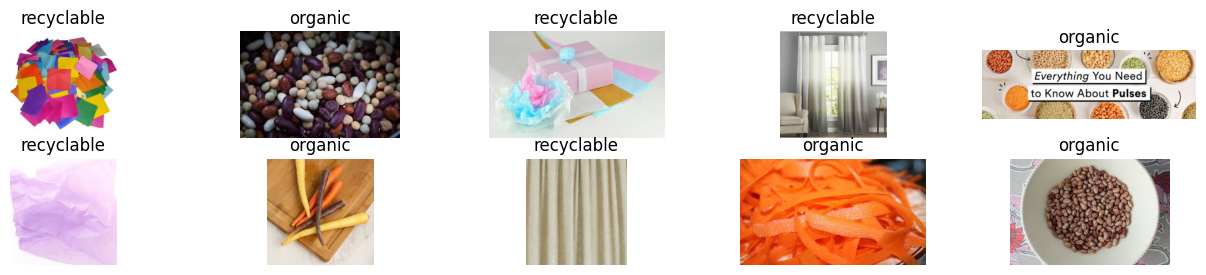

In [ ]:
#Marcamos cada una de las imagenes según su clase
classes = os.listdir(path)

plt.figure(figsize=(16,8))

for x in range(10):
    i = random.randint(0,1)
    images = os.listdir(path+'/'+classes[i])
    j = random.randint(0,900)
    image = cv2.imread(path+'/'+classes[i]+'/'+images[j])
    image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    ax = plt.subplot(5,5,x+1)
    plt.imshow(image)
    plt.title(classes[i])
    plt.axis("off")


plt.show()

In [ ]:
train_data = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_ds = train_data.flow_from_directory(
    path,
    subset='training',
    target_size=(224,224),
    batch_size=32

)
test_ds=train_data.flow_from_directory(
    path,
    subset='validation',
    target_size=(224,224),
    batch_size=32
)

Found 2011 images belonging to 2 classes.
Found 502 images belonging to 2 classes.


In [ ]:
# Obtener un lote de datos de entrenamiento
batch_images, batch_labels = train_ds.next()

# Convertir las imágenes en un formato adecuado para DataFrame
image_data = batch_images.reshape(batch_images.shape[0], -1)

# Convertir las etiquetas a un array unidimensional
labels = np.argmax(batch_labels, axis=1)

# Crear un DataFrame con los datos de las imágenes y sus etiquetas
columns = [f'pixel_{i}' for i in range(image_data.shape[1])]
df_train = pd.DataFrame(image_data, columns=columns)
df_train['label'] = labels

# Mostrar el DataFrame
df_train.head()

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_150519,pixel_150520,pixel_150521,pixel_150522,pixel_150523,pixel_150524,pixel_150525,pixel_150526,pixel_150527,label
0,0.815686,0.788235,0.713726,0.815686,0.788235,0.713726,0.815686,0.788235,0.713726,0.815686,...,0.890196,0.866667,0.819608,0.890196,0.866667,0.819608,0.890196,0.866667,0.819608,1
1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1
2,0.372549,0.541176,0.847059,0.329412,0.501961,0.890196,0.388235,0.580392,1.000000,0.305882,...,0.066667,0.458824,0.827451,0.023529,0.368627,0.862745,0.023529,0.368627,0.862745,0
3,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1
4,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1


In [ ]:
# Obtener un lote de datos de prueba
batch_images, batch_labels = test_ds.next()

# Convertir las imágenes en un formato adecuado para DataFrame
image_data = batch_images.reshape(batch_images.shape[0], -1)

# Convertir las etiquetas a un array unidimensional
labels = np.argmax(batch_labels, axis=1)

# Crear un DataFrame con los datos de las imágenes y sus etiquetas
columns = [f'pixel_{i}' for i in range(image_data.shape[1])]
df_test = pd.DataFrame(image_data, columns=columns)
df_test['label'] = labels

# Mostrar el DataFrame
df_test.head()

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_150519,pixel_150520,pixel_150521,pixel_150522,pixel_150523,pixel_150524,pixel_150525,pixel_150526,pixel_150527,label
0,0.305882,0.537255,0.521569,0.345098,0.556863,0.556863,0.376471,0.560784,0.584314,0.349020,...,0.160784,0.309804,0.454902,0.125490,0.286275,0.411765,0.254902,0.435294,0.537255,1
1,0.568627,0.529412,0.494118,0.568627,0.529412,0.494118,0.572549,0.521569,0.486275,0.568627,...,0.137255,0.094118,0.078431,0.137255,0.094118,0.086275,0.113725,0.074510,0.070588,1
2,0.211765,0.160784,0.129412,0.098039,0.058824,0.023529,0.066667,0.050980,0.003922,0.101961,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0
3,0.125490,0.066667,0.054902,0.125490,0.066667,0.054902,0.125490,0.066667,0.054902,0.121569,...,0.117647,0.074510,0.129412,0.109804,0.078431,0.129412,0.105882,0.074510,0.125490,0
4,0.670588,0.631373,0.635294,0.670588,0.631373,0.635294,0.674510,0.635294,0.639216,0.674510,...,0.490196,0.439216,0.415686,0.474510,0.423529,0.400000,0.494118,0.450980,0.427451,0


In [ ]:
def load_dataset(df_test, df_train):
    """
    Carga el conjunto de datos desde los DataFrames proporcionados.

    Argumentos:
    df_test: DataFrame que contiene los datos de prueba.
    df_train: DataFrame que contiene los datos de entrenamiento.

    Retorna:
    train_set_x_orig: Array numpy de los features de entrenamiento.
    train_set_y_orig: Array numpy de las etiquetas de entrenamiento.
    test_set_x_orig: Array numpy de los features de prueba.
    test_set_y_orig: Array numpy de las etiquetas de prueba.
    classes: Array numpy que contiene las clases ['organic', 'recyclable'].
    """

    # Se extraen los features de entrenamiento y las etiquetas de entrenamiento del DataFrame de entrenamiento.
    train_set_x_orig = np.array(df_train.drop('label', axis=1)) # Los features de entrenamiento
    train_set_y_orig = np.array(df_train['label']) # Las etiquetas de entrenamiento

    # Se extraen los features de prueba y las etiquetas de prueba del DataFrame de prueba.
    test_set_x_orig = np.array(df_test.drop('label', axis=1)) # Los features de prueba
    test_set_y_orig = np.array(df_test['label']) # Las etiquetas de prueba

    # Se define la lista de clases.
    classes = np.array(["organic", "recyclabe"])

    # Se ajustan las dimensiones de las etiquetas para que coincidan con las expectativas del modelo.
    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))

    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

## Carga de los datos

In [ ]:
train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_dataset(df_test,df_train)

In [ ]:
print(train_set_x_orig[:5])

[[0.81568635 0.78823537 0.7137255  ... 0.89019614 0.86666673 0.8196079 ]
 [1.         1.         1.         ... 1.         1.         1.        ]
 [0.37254903 0.5411765  0.8470589  ... 0.02352941 0.36862746 0.86274517]
 [1.         1.         1.         ... 1.         1.         1.        ]
 [1.         1.         1.         ... 1.         1.         1.        ]]


In [ ]:
# Aplanar el arreglo de entrenamiento
train_set_x_flatten = train_set_x_orig.reshape(train_set_x_orig.shape[0], -1).T
# Aplanar el arreglo de prueba
test_set_x_flatten = test_set_x_orig.reshape(test_set_x_orig.shape[0], -1).T

print ("train_set_x_flatten shape: " + str(train_set_x_flatten.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x_flatten shape: " + str(test_set_x_flatten.shape))
print ("test_set_y shape: " + str(test_set_y.shape))
print ("sanity check after reshaping: " + str(train_set_x_flatten[0:5,0]))

train_set_x_flatten shape: (150528, 32)
train_set_y shape: (1, 32)
test_set_x_flatten shape: (150528, 32)
test_set_y shape: (1, 32)
sanity check after reshaping: [0.81568635 0.78823537 0.7137255  0.81568635 0.78823537]


In [ ]:
### START CODE HERE ### (≈ 3 lines of code)
m_train = train_set_y.shape[1]
m_test = test_set_y.shape[1]
num_px = train_set_x_orig.shape[1]
### END CODE HERE ###

print ("Number of training examples: m_train = " + str(m_train))
print ("Number of testing examples: m_test = " + str(m_test))
print ("Height/Width of each image: num_px = " + str(num_px))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_set_x shape: " + str(train_set_x_orig.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x shape: " + str(test_set_x_orig.shape))
print ("test_set_y shape: " + str(test_set_y.shape))

Number of training examples: m_train = 32
Number of testing examples: m_test = 32
Height/Width of each image: num_px = 150528
Each image is of size: (150528, 150528, 3)
train_set_x shape: (32, 150528)
train_set_y shape: (1, 32)
test_set_x shape: (32, 150528)
test_set_y shape: (1, 32)


In [ ]:
# Reshape the training and test examples

### START CODE HERE ### (≈ 2 lines of code)
train_set_x_flatten = train_set_x_orig.reshape(train_set_x_orig.shape[0], -1).T
test_set_x_flatten = test_set_x_orig.reshape(test_set_x_orig.shape[0], -1).T
### END CODE HERE ###

print ("train_set_x_flatten shape: " + str(train_set_x_flatten.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x_flatten shape: " + str(test_set_x_flatten.shape))
print ("test_set_y shape: " + str(test_set_y.shape))
print ("sanity check after reshaping: " + str(train_set_x_flatten[0:5,0]))

train_set_x_flatten shape: (150528, 32)
train_set_y shape: (1, 32)
test_set_x_flatten shape: (150528, 32)
test_set_y shape: (1, 32)
sanity check after reshaping: [0.81568635 0.78823537 0.7137255  0.81568635 0.78823537]


In [ ]:
train_set_x = train_set_x_flatten / 255.
test_set_x = test_set_x_flatten / 255.

## Funciones Auxiliares

### Función Sigmoide

In [ ]:
def sigmoid(z):
    """
    Calcula la sigmoide de z

    Arguments:
    z -- Un escalar o un array numpy de cualquier tamaño.

    Return:
    s -- sigmoid(z)
    """

    s = 1 / (1 + np.exp(-z))

    return s

In [ ]:
print ("sigmoid(0) = " + str(sigmoid(0)))
print ("sigmoid(9.2) = " + str(sigmoid(9.2)))

sigmoid(0) = 0.5
sigmoid(9.2) = 0.9998989708060922


### Inicializar parámetros

In [ ]:
def initialize_with_zeros(dim):
    """
    Esta función crea un vector de ceros de forma (dim, 1) for w e inicializa b a 0

    Argumentos:
    dim -- tamaño del vector w que queremos (o número de parámetros)

    Returns:
    w -- vector de forma (dim, 1)
    b -- escalar (corresponde al sesgo)
    """

    w = np.zeros(shape=(dim, 1))
    b = 0

    assert(w.shape == (dim, 1))
    assert(isinstance(b, float) or isinstance(b, int))

    return w, b

In [ ]:
dim = 2
w, b = initialize_with_zeros(dim)
print ("w = " + str(w))
print ("b = " + str(b))

w = [[0.]
 [0.]]
b = 0


### Propagación hacia adelante y hacia atrás

In [ ]:

def propagate(w, b, X, Y):
    """
    Implemente la función de costo y su gradiente para la propagación explicada anteriormente.

    Argumentos:

    w -- pesos, un arreglo NumPy de tamaño (num_px * num_px * 3, 1)
    b -- sesgo, un escalar
    X -- datos de tamaño (num_px * num_px * 3, número de ejemplos)
    Y -- vector verdadero de "etiquetas" (contiene 0 si no es gato, 1 si es gato) de tamaño (1, número de ejemplos)
    Retorno:

    costo -- costo de log-verosimilitud negativa para la regresión logística
    dw -- gradiente de la pérdida con respecto a w, por lo tanto, tiene la misma forma que w
    db -- gradiente de la pérdida con respecto a b, por lo tanto, tiene la misma forma que b

    Consejos:
    Escriba su código paso a paso para la propagación.
    """

    m = X.shape[1]

    A = sigmoid(np.dot(w.T, X) + b)

    cost = (- 1 / m) * np.sum(Y * np.log(A) + (1 - Y) * (np.log(1 - A)))

    dw = (1 / m) * np.dot(X, (A - Y).T)
    db = (1 / m) * np.sum(A - Y)

    assert(dw.shape == w.shape)
    assert(db.dtype == float)
    cost = np.squeeze(cost)
    assert(cost.shape == ())

    grads = {"dw": dw,
             "db": db}

    return grads, cost

In [ ]:
w, b, X, Y = np.array([[1], [2]]), 2, np.array([[1,2], [3,4]]), np.array([[1, 0]])
grads, cost = propagate(w, b, X, Y)
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))
print ("cost = " + str(cost))

dw = [[0.99993216]
 [1.99980262]]
db = 0.49993523062470574
cost = 6.000064773192205


### Optimization

In [ ]:
def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost = False):
    """
      Esta función optimiza w y b ejecutando un algoritmo de descenso del gradiente.

      Argumentos:

      w -- pesos, un arreglo NumPy de tamaño (num_px * num_px * 3, 1)
      b -- sesgo, un escalar
      X -- datos de tamaño (num_px * num_px * 3, número de ejemplos)
      Y -- vector verdadero de "etiquetas" (contiene 0 si no es gato, 1 si es gato), de tamaño (1, número de ejemplos)
      num_iterations -- número de iteraciones del bucle de optimización
      learning_rate -- tasa de aprendizaje de la regla de actualización del descenso del gradiente
      print_cost -- True para imprimir la pérdida cada 100 pasos
      Retorno:

      params -- diccionario que contiene los pesos w y el sesgo b
      grads -- diccionario que contiene los gradientes de los pesos y el sesgo con respecto a la función de costo
      costs -- lista de todos los costos calculados durante la optimización, se utilizará para trazar la curva de aprendizaje.
      Consejos:

      Básicamente, necesitas escribir dos pasos e iterar a través de ellos:

      Calcular el costo y el gradiente para los parámetros actuales. Utiliza propagate().
      Actualiza los parámetros utilizando la regla de descenso del gradiente para w y b.
    """

    costs = []

    for i in range(num_iterations):

        grads, cost = propagate(w, b, X, Y)

        dw = grads["dw"]
        db = grads["db"]

        w = w - learning_rate * dw
        b = b - learning_rate * db

        if i % 100 == 0:
            costs.append(cost)

        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" % (i, cost))

    params = {"w": w,
              "b": b}

    grads = {"dw": dw,
             "db": db}

    return params, grads, costs

In [ ]:
params, grads, costs = optimize(w, b, X, Y, num_iterations= 100, learning_rate = 0.009, print_cost = False)

print ("w = " + str(params["w"]))
print ("b = " + str(params["b"]))
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))

w = [[0.1124579 ]
 [0.23106775]]
b = 1.5593049248448891
dw = [[0.90158428]
 [1.76250842]]
db = 0.4304620716786828


In [ ]:
def predict(w, b, X):
    '''
      Prediga si la etiqueta es 0 o 1 usando los parámetros aprendidos de regresión logística (w, b).

      Argumentos:

      w -- pesos, un arreglo NumPy de tamaño (num_px * num_px * 3, 1)
      b -- sesgo, un escalar
      X -- datos de tamaño (num_px * num_px * 3, número de ejemplos)
      Retorno:

      Y_prediction -- un arreglo NumPy (vector) que contiene todas las predicciones (0/1) para los ejemplos en X
    '''

    m = X.shape[1]
    Y_prediction = np.zeros((1, m))
    w = w.reshape(X.shape[0], 1)

    A = sigmoid(np.dot(w.T, X) + b)

    for i in range(A.shape[1]):
        Y_prediction[0, i] = 1 if A[0, i] > 0.5 else 0

    assert(Y_prediction.shape == (1, m))

    return Y_prediction

In [ ]:
print("predictions = " + str(predict(w, b, X)))

predictions = [[1. 1.]]


### Combinar las funciones en el modelo

In [ ]:
# GRADED FUNCTION: model

def model(X_train, Y_train, X_test, Y_test, num_iterations=2000, learning_rate=0.5, print_cost=False):
    """
      Construye el modelo de regresión logística llamando a la función que implementó anteriormente.

      Argumentos:

      X_train -- conjunto de entrenamiento representado por un arreglo NumPy de forma (num_px * num_px * 3, m_train)
      Y_train -- etiquetas de entrenamiento representadas por un arreglo NumPy (vector) de forma (1, m_train)
      X_test -- conjunto de prueba representado por un arreglo NumPy de forma (num_px * num_px * 3, m_test)
      Y_test -- etiquetas de prueba representadas por un arreglo NumPy (vector) de forma (1, m_test)
      num_iterations -- hiperparámetro que representa el número de iteraciones para optimizar los parámetros
      learning_rate -- hiperparámetro que representa la tasa de aprendizaje utilizada en la regla de actualización de optimize()
      print_cost -- Establecido en True para imprimir el costo cada 100 iteraciones

      Retorno:
      d -- diccionario que contiene información sobre el modelo.
    """

    w, b = initialize_with_zeros(X_train.shape[0])

    parameters, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)

    w = parameters["w"]
    b = parameters["b"]

    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)

    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))

    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test,
         "Y_prediction_train" : Y_prediction_train,
         "w" : w,
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}

    return d

### Entrenar el modelo

In [ ]:
d = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 2000, learning_rate = 0.005, print_cost = True)

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.688568
Cost after iteration 200: 0.685139
Cost after iteration 300: 0.682405
Cost after iteration 400: 0.680094
Cost after iteration 500: 0.678042
Cost after iteration 600: 0.676151
Cost after iteration 700: 0.674364
Cost after iteration 800: 0.672643
Cost after iteration 900: 0.670969
Cost after iteration 1000: 0.669329
Cost after iteration 1100: 0.667714
Cost after iteration 1200: 0.666119
Cost after iteration 1300: 0.664543
Cost after iteration 1400: 0.662982
Cost after iteration 1500: 0.661436
Cost after iteration 1600: 0.659905
Cost after iteration 1700: 0.658387
Cost after iteration 1800: 0.656882
Cost after iteration 1900: 0.655390
train accuracy: 59.375 %
test accuracy: 50.0 %


**Comment**: Training accuracy is close to 100%. This is a good sanity check: your model is working and has high enough capacity to fit the training data. Test error is 68%. It is actually not bad for this simple model, given the small dataset we used and that logistic regression is a linear classifier. But no worries, you'll build an even better classifier next week!

Also, you see that the model is clearly overfitting the training data. Later in this specialization you will learn how to reduce overfitting, for example by using regularization. Using the code below (and changing the `index` variable) you can look at predictions on pictures of the test set.

Let's also plot the cost function and the gradients.

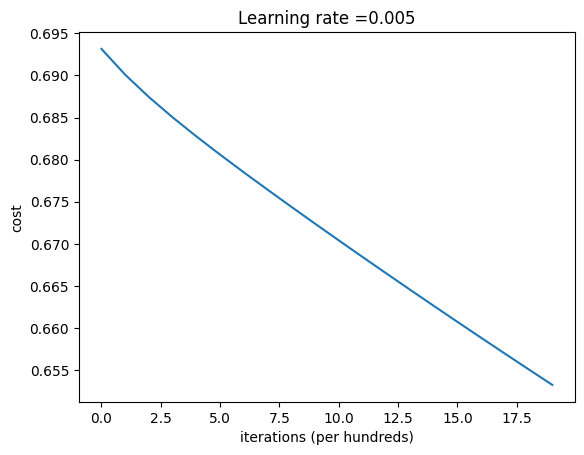

In [ ]:
# Plot learning curve (with costs)
costs = np.squeeze(d['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(d["learning_rate"]))
plt.show()

**Interpretation**:
You can see the cost decreasing. It shows that the parameters are being learned. However, you see that you could train the model even more on the training set. Try to increase the number of iterations in the cell above and rerun the cells. You might see that the training set accuracy goes up, but the test set accuracy goes down. This is called overfitting.

## 6 - Further analysis (optional/ungraded exercise) ##

Congratulations on building your first image classification model. Let's analyze it further, and examine possible choices for the learning rate $\alpha$.

#### Choice of learning rate ####

**Reminder**:
In order for Gradient Descent to work you must choose the learning rate wisely. The learning rate $\alpha$  determines how rapidly we update the parameters. If the learning rate is too large we may "overshoot" the optimal value. Similarly, if it is too small we will need too many iterations to converge to the best values. That's why it is crucial to use a well-tuned learning rate.

Let's compare the learning curve of our model with several choices of learning rates. Run the cell below. This should take about 1 minute. Feel free also to try different values than the three we have initialized the `learning_rates` variable to contain, and see what happens.

learning rate is: 0.01
train accuracy: 71.875 %
test accuracy: 87.5 %

-------------------------------------------------------

learning rate is: 0.001
train accuracy: 50.0 %
test accuracy: 43.75 %

-------------------------------------------------------

learning rate is: 0.0001
train accuracy: 50.0 %
test accuracy: 43.75 %

-------------------------------------------------------



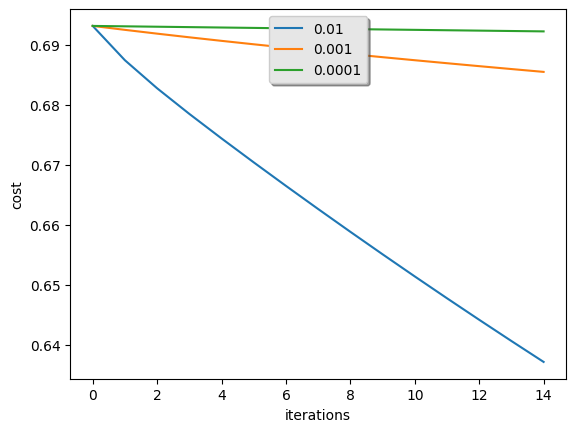

In [ ]:
learning_rates = [0.01, 0.001, 0.0001]
models = {}
for i in learning_rates:
    print ("learning rate is: " + str(i))
    models[str(i)] = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 1500, learning_rate = i, print_cost = False)
    print ('\n' + "-------------------------------------------------------" + '\n')

for i in learning_rates:
    plt.plot(np.squeeze(models[str(i)]["costs"]), label= str(models[str(i)]["learning_rate"]))

plt.ylabel('cost')
plt.xlabel('iterations')

legend = plt.legend(loc='upper center', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
plt.show()

**Interpretation**:
- Different learning rates give different costs and thus different predictions results.
- If the learning rate is too large (0.01), the cost may oscillate up and down. It may even diverge (though in this example, using 0.01 still eventually ends up at a good value for the cost).
- A lower cost doesn't mean a better model. You have to check if there is possibly overfitting. It happens when the training accuracy is a lot higher than the test accuracy.
- In deep learning, we usually recommend that you:
    - Choose the learning rate that better minimizes the cost function.
    - If your model overfits, use other techniques to reduce overfitting. (We'll talk about this in later videos.)
